In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
EquipFailure_train=pd.read_csv(r'C:\Users\vidye\Desktop\predictive_maintenance.csv')
EquipFailure_train.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [3]:
EquipFailure_train.describe(include=[np.number,np.object_])

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,9652
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,NaN


In [4]:
EquipFailure_train=EquipFailure_train.replace('na',np.NaN)

In [5]:
EquipFailure_train.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

UDI  Product ID  count
Target Failure Type                                     
0      No Failure                9643        9643   9643
       Random Failures             18          18     18
1      Heat Dissipation Failure   112         112    112
       No Failure                   9           9      9
       Overstrain Failure          78          78     78
       Power Failure               95          95     95
       Tool Wear Failure           45          45     45

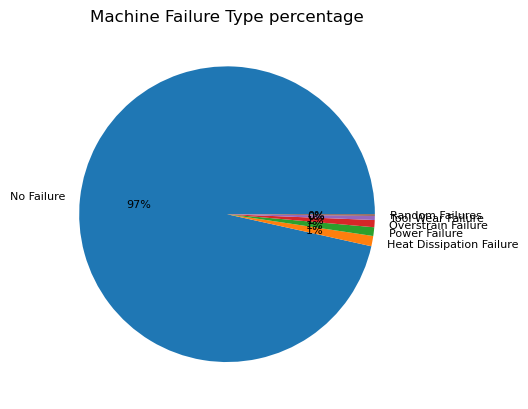

In [6]:
value = EquipFailure_train['Failure Type'].value_counts()
Type_percentage = 100*value/EquipFailure_train.UDI.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette()[0:6], autopct='%.0f%%', textprops={'fontsize': 8})
plt.title('Machine Failure Type percentage')
plt.show()

In [7]:
EquipFailure_train.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [8]:
EquipFailure_train['UDI'].astype(float)
EquipFailure_train['Rotational speed [rpm]'].astype(float)
EquipFailure_train['Tool wear [min]'].astype(float)
EquipFailure_train['Target'].astype(float)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Target, Length: 10000, dtype: float64

In [9]:
nan_percentage = EquipFailure_train.isna().mean() * 100

# Display the percentage of NaN values for each column
print(nan_percentage)

UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Target                     0.0
Failure Type               0.0
dtype: float64


In [10]:
columns_to_drop = nan_percentage[nan_percentage > 50].index
EquipFailure_train_cleaned =EquipFailure_train.drop(columns=columns_to_drop)


In [20]:
EquipFailure_train.head()


,UDI,Product ID,Type,airtemp,processtemp,rpm,torque,toolwear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [36]:
EquipFailure_train=EquipFailure_train.drop(['Type'],axis=1)

In [37]:
EquipFailure_train.head()


,UDI,airtemp,processtemp,rpm,torque,toolwear,Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,No Failure
1,2,298.2,308.7,1408,46.3,3,0,No Failure
2,3,298.1,308.5,1498,49.4,5,0,No Failure
3,4,298.2,308.6,1433,39.5,7,0,No Failure
4,5,298.2,308.7,1408,40.0,9,0,No Failure


In [38]:
EquipFailure_train = EquipFailure_train.rename(columns = {'Air temperature [K]':'airtemp', 'Process temperature [K]':'processtemp', 'Rotational speed [rpm]':'rpm', 'Torque [Nm]':'torque', 'Tool wear [min]':'toolwear'})
     

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import time

In [82]:
X = EquipFailure_train.drop('Failure Type', axis=1)
y = EquipFailure_train['Failure Type']

In [83]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN (k=1) Accuracy: 98.95%
KNN (k=1) Time: 0.06 seconds
KNN (k=2) Accuracy: 98.80%
KNN (k=2) Time: 0.05 seconds
KNN (k=3) Accuracy: 98.95%
KNN (k=3) Time: 0.06 seconds
KNN (k=4) Accuracy: 98.85%
KNN (k=4) Time: 0.06 seconds
KNN (k=5) Accuracy: 98.90%
KNN (k=5) Time: 0.06 seconds
KNN (k=6) Accuracy: 98.95%
KNN (k=6) Time: 0.06 seconds
KNN (k=7) Accuracy: 98.85%
KNN (k=7) Time: 0.06 seconds
KNN (k=8) Accuracy: 98.85%
KNN (k=8) Time: 0.06 seconds
KNN (k=9) Accuracy: 98.85%
KNN (k=9) Time: 0.06 seconds
KNN (k=10) Accuracy: 98.80%
KNN (k=10) Time: 0.06 seconds


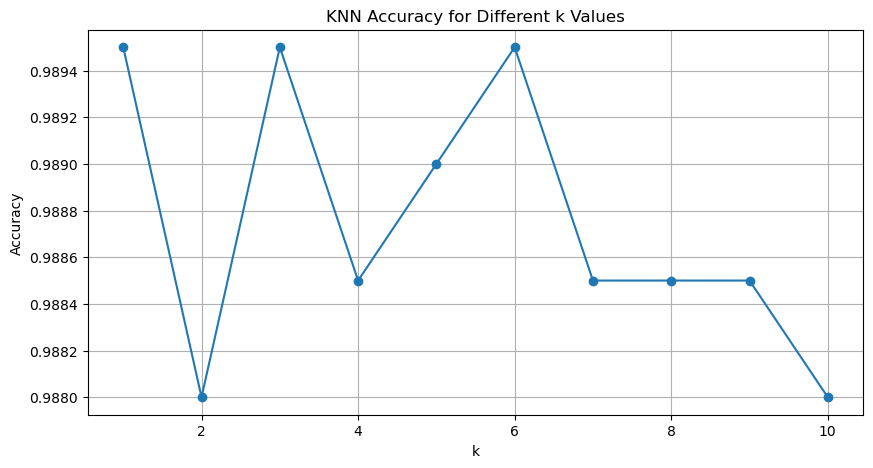

In [85]:

# Evaluate KNN for different values of k
k_values = range(1, 11)
knn_accuracies = []
knn_times = []
best_knn_model = None
best_knn_accuracy = 0
best_knn_k = 0

for k in k_values:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_accuracy)
    knn_time = time.time() - start_time
    knn_times.append(knn_time)
    print(f'KNN (k={k}) Accuracy: {knn_accuracy * 100:.2f}%')
    print(f'KNN (k={k}) Time: {knn_time:.2f} seconds')
    if knn_accuracy > best_knn_accuracy:
        best_knn_accuracy = knn_accuracy
        best_knn_model = knn
        best_knn_k = k

# Plot KNN accuracies
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [86]:
#Highest accuracy is for k=6
# k-Nearest Neighbors
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_time = time.time() - start_time
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'KNN Time: {knn_time:.2f} seconds')

KNN Accuracy: 98.95%
KNN Time: 0.07 seconds


In [87]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_time = time.time() - start_time
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Random Forest Time: {rf_time:.2f} seconds')

Random Forest Accuracy: 99.45%
Random Forest Time: 0.49 seconds
